In [2]:
import numpy as np
from numba import njit
from matplotlib import pyplot as plt

In [20]:
def friction_function(v, vt=1):
    if v > vt:
        return -3 * v
    else:
        return -3 * vt * np.sign(v)

def damped_mass_spring_system(x_0, t_max=10, k=100, dt=0.0001, vt=1.0):
    times = np.arange(0, t_max, dt)
    positions = np.zeros_like(times)

    v = 0
    a = 0
    x = x_0

    positions[0] = x_0 / x_0

    for ii in range(len(times)):
        if ii == 0:
            continue

        t = times[ii]
        a = friction_function(v, vt) - k * x
        v += a * dt
        x += v * dt

        positions[ii] = x / x_0
    return times, positions
            
        

In [21]:
%time _ = damped_mass_spring_system(1)

CPU times: user 251 ms, sys: 0 ns, total: 251 ms
Wall time: 249 ms


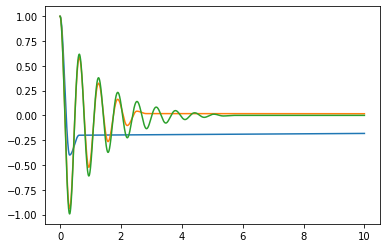

In [5]:
plt.plot(*damped_mass_spring_system(0.1))
plt.plot(*damped_mass_spring_system(1))
plt.plot(*damped_mass_spring_system(10))

## Goal: simulate this system for initial conditions going from 0 to 10.000 at 0.1 increments

## Calculated duration: 1 run = 285 ms -> 100.000 runs = 100000 * 0.250 / 3600 ~= 7 hours

In [22]:
@njit
def friction_function(v, vt=1):
    if v > vt:
        return -3 * v
    else:
        return -3 * vt * np.sign(v)

@njit
def damped_mass_spring_system(x_0, t_max=10, k=100, dt=0.0001, vt=1.0):
    times = np.arange(0, t_max, dt)
    positions = np.zeros_like(times)

    v = 0
    a = 0
    x = x_0

    positions[0] = x_0 / x_0

    for ii in range(len(times)):
        if ii == 0:
            continue

        t = times[ii]
        a = friction_function(v, vt) - k * x
        v += a * dt
        x += v * dt

        positions[ii] = x / x_0
    return times, positions
            
        

In [24]:
%time _ = damped_mass_spring_system(1)

CPU times: user 945 µs, sys: 0 ns, total: 945 µs
Wall time: 950 µs


## Calculated duration: 1 run = 1 ms -> 100.000 runs = 100000 * 0.001 / 60 ~= 1.7 min!

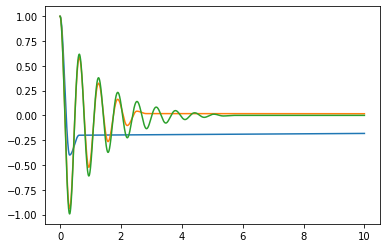

In [25]:
plt.plot(*damped_mass_spring_system(0.1))
plt.plot(*damped_mass_spring_system(1))
plt.plot(*damped_mass_spring_system(10))

In [29]:
@njit(nogil=True)
def friction_function(v, vt=1):
    if v > vt:
        return -3 * v
    else:
        return -3 * vt * np.sign(v)

@njit(nogil=True)
def damped_mass_spring_system(x_0, t_max=10, k=100, dt=0.0001, vt=1.0):
    times = np.arange(0, t_max, dt)
    positions = np.zeros_like(times)

    v = 0
    a = 0
    x = x_0

    positions[0] = x_0 / x_0

    for ii in range(len(times)):
        if ii == 0:
            continue

        t = times[ii]
        a = friction_function(v, vt) - k * x
        v += a * dt
        x += v * dt

        positions[ii] = x / x_0
    return times, positions
            

In [31]:
%time _ = damped_mass_spring_system(1)

CPU times: user 2.19 ms, sys: 0 ns, total: 2.19 ms
Wall time: 917 µs


In [32]:
%%time
from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor(8) as ex:
    ex.map(damped_mass_spring_system, np.arange(0.1, 1000, 0.1))

CPU times: user 14.4 s, sys: 471 ms, total: 14.9 s
Wall time: 2.59 s


# Measured duration: 2.54 seconds! -> 10.000 runs: 25 seconds!

In [39]:
from numba import prange

@njit(parallel=True)
def run_sims(end=1000):
    for ii in prange(int(end/0.1)):
        if ii == 0:
            continue
        damped_mass_spring_system(ii*0.1)

In [43]:
%%time
run_sims(1000)

CPU times: user 14.9 s, sys: 23 ms, total: 15 s
Wall time: 1.96 s


# Measured duration: 1.96 seconds! -> 10.000 runs: 20 seconds!